# Assignment 7


In [1]:
# Imports
import timeit
import numpy as np
import random
from matplotlib import pyplot as plt

## Step 1

In [2]:
def generateMatrix(N,M):# N is size of matrix , M is upper bound for random entries
    A = []
    for i in range(N):
        Z = []
        for j in range(N):
            Z.append(random.random()*M)
        A.append(np.array(Z))
    return np.array(A)

In [3]:
M = 100 # change here to change in all cases
A,B = generateMatrix(10,M),generateMatrix(10,M)

In [4]:
def mul1(A,B):
    return np.matmul(A,B)
def mul2(A,B):
    return A@B
def mul3(A,B):
    m, n = A.shape
    n, p = B.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += A[i,k] * B[k,j]
    return res

In [5]:
%timeit mul1(A,B)

1.97 µs ± 28.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [6]:
%timeit mul2(A,B)

1.93 µs ± 15.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [7]:
%timeit mul3(A,B)

560 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


We have indented a for loop inside one another 3 times , each loop running N (Dimension of the array) times. N is 10 here , so we have 1000 multiplications happening here. This implies 2000 floating point operations . 1.85 us for 2000 floating point operations gives us the simple result of 1.081 GFLOPS

## Step 2
lscpu shows 2.1 GHz , I have chosen to use the jupyter server itself as jupyter notebooks cause issues on my device . This means 2.1 GFLOPS can be achieved using a single processor core. This is about double the estimated rate of GFLOPS from step 1 . Possible reason for this is memory accessing time which is happening at every step.

In [8]:
!lscpu

Architecture:                       x86_64
CPU op-mode(s):                     32-bit, 64-bit
Byte Order:                         Little Endian
Address sizes:                      40 bits physical, 48 bits virtual
CPU(s):                             16
On-line CPU(s) list:                0-15
Thread(s) per core:                 1
Core(s) per socket:                 16
Socket(s):                          1
NUMA node(s):                       1
Vendor ID:                          GenuineIntel
CPU family:                         15
Model:                              6
Model name:                         Common KVM processor
Stepping:                           1
CPU MHz:                            2099.998
BogoMIPS:                           4199.99
Hypervisor vendor:                  KVM
Virtualization type:                full
L1d cache:                          512 KiB
L1i cache:                          512 KiB
L2 cache:                           64 MiB
L3 cache:                      

## Step 3

In [9]:

x = 10
Results = []
for i in range(4):
    A,B = generateMatrix(x,M),generateMatrix(x,M)
    print('Order of Matrix:',x,end = ' ')
    s = %timeit -r 3 -n 50 -o mul1(A,B)
    Results.append(s)
    x *= 2
for i in range(4):
    A,B = generateMatrix(x,M),generateMatrix(x,M)
    print('Order of Matrix:',x,end = ' ')
    s = %timeit -r 3 -n 10 -o mul1(A,B)
    Results.append(s)
    x *= 2

Order of Matrix: 10 The slowest run took 18.28 times longer than the fastest. This could mean that an intermediate result is being cached.
12.9 µs ± 15.5 µs per loop (mean ± std. dev. of 3 runs, 50 loops each)
Order of Matrix: 20 4.1 µs ± 195 ns per loop (mean ± std. dev. of 3 runs, 50 loops each)
Order of Matrix: 40 20.6 µs ± 429 ns per loop (mean ± std. dev. of 3 runs, 50 loops each)
Order of Matrix: 80 147 µs ± 99.2 µs per loop (mean ± std. dev. of 3 runs, 50 loops each)
Order of Matrix: 160 The slowest run took 5.24 times longer than the fastest. This could mean that an intermediate result is being cached.
587 µs ± 472 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
Order of Matrix: 320 1.57 ms ± 515 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
Order of Matrix: 640 9.45 ms ± 528 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
Order of Matrix: 1280 71.1 ms ± 1.02 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [10]:
# function to parse through the output of %timeit
def get_vals(s):
    means,devs = [],[]
    for i in Results:
        l = str(i).split(' ')
        mean = float(l[0])
        if(l[1] == 'ms'):
            mean *= 1000
        elif(l[1] == 's'):
            mean *= 1000000
        dev = float(l[3])
        if(l[4] == 'µs'):
            dev *= 1000
        elif(l[4] == 'ms'):
            dev *= 1000000
        means.append(mean)
        devs.append(dev)
    return means,devs

In [11]:
means,devs = get_vals(Results)

In [12]:
d = [10*(2**x) for x in range(len(means))]
print(means,d)

[12.9, 4.1, 20.6, 147.0, 587.0, 1570.0, 9450.0, 71100.0] [10, 20, 40, 80, 160, 320, 640, 1280]


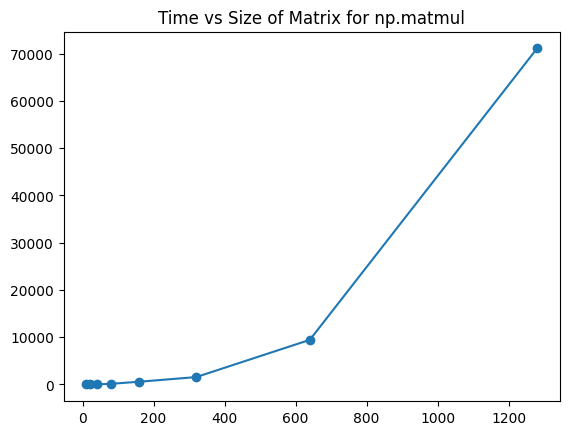

In [13]:
plt.plot(d,means)
plt.scatter(d,means)
plt.title('Time vs Size of Matrix for np.matmul')
plt.show()

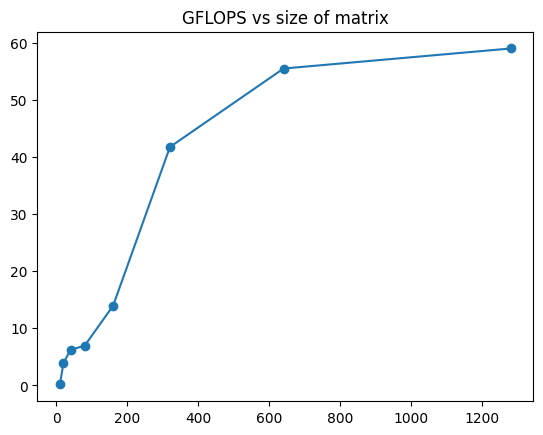

In [14]:
G = []
for i in range(len(d)):
  G.append(((d[i])**3)*2/means[i] * (10**-3))
plt.plot(d,G)
plt.scatter(d,G)
plt.title('GFLOPS vs size of matrix')
plt.show()

In [15]:
x = 10
Results = []
for i in range(3):
    A,B = generateMatrix(x,M),generateMatrix(x,M)
    print('Order of Matrix:',x,end = ' ')
    s = %timeit -r 3 -n 3 -o mul3(A,B)
    Results.append(s)
    x *= 2
for i in range(2):
    A,B = generateMatrix(x,M),generateMatrix(x,M)
    print('Order of Matrix:',x,end = ' ')
    s = %timeit -r 3 -n 1 -o mul3(A,B)
    Results.append(s)
    x *= 2

Order of Matrix: 10 573 µs ± 28.8 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
Order of Matrix: 20 4.41 ms ± 71.5 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
Order of Matrix: 40 33.9 ms ± 247 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
Order of Matrix: 80 263 ms ± 3.9 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Order of Matrix: 160 2.12 s ± 48.9 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [16]:
means,devs = get_vals(Results)

In [17]:
d = [10* (2**x) for x in range(len(means))]
print(means,d)

[573.0, 4410.0, 33900.0, 263000.0, 2120000.0] [10, 20, 40, 80, 160]


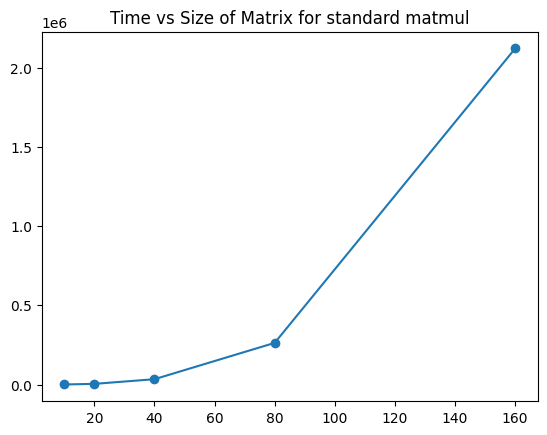

In [18]:
plt.plot(d,means)
plt.scatter(d,means)
plt.title('Time vs Size of Matrix for standard matmul')
plt.show()

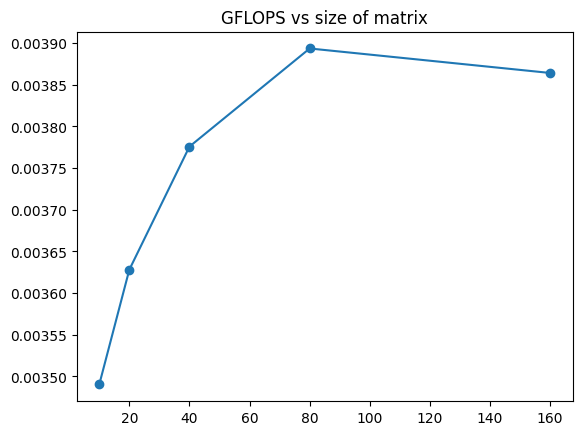

In [19]:
G = []
for i in range(len(d)):
  G.append(((d[i])**3)*2/means[i] * (10**-3))
plt.plot(d,G)
plt.scatter(d,G)
plt.title('GFLOPS vs size of matrix')
plt.show()

## GFLOPS Observations
Initially the number of GFLOPS is less and then increases to a steady value. This is because for low sizes of matrix. This is because for small size of matrix , the initialization code also takes up a significant number of clock cycles , but these becoem negligible as size increases. Also , on average the np.matmul runs about 1000 times faster , which can be concluded using from the ratio of GFLOPS graphs for the 2 functions.

## Why is numpy code higher than theoretical estimate 
We see that the numpy code has about 60 GFlops on a CPU which runs at 2.1 GHz . Explanation for this is that the CPU has multiple cores and can handle multiple processes side by side , using this it is able to run multiple processes and speed up the code. 




# Observations for step 3


## Step 4

In [20]:
%load_ext Cython

Code for standard Cython implementation of matmul with no changes

In [37]:
%%cython -a
import numpy as np
#Declare each of the variables i, j, k, m, n, p as int types
def cy_matmul(u, v):
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            #res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [38]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))
%timeit -n 10 -r 3 cy_matmul(u, v)
%timeit -n 10 -r 3 mul3(u,v)

60 ms ± 1.08 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)
69.8 ms ± 449 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)


# observation for step 4

The cython code is slightly faster but the speed up is minimal since as we have not made any modifications which will allow the extension to optimise the code. Possible reasons for this , is due to the inbuilt optimisations in Cython for handling Numpy objects . 

In [39]:
%%cython -a
import numpy as np
#Declare each of the variables i, j, k, m, n, p as int types
def cy_matmul(u, v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [40]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))
%timeit -n 50 -r 3 cy_matmul(u, v)

67.7 ms ± 167 µs per loop (mean ± std. dev. of 3 runs, 50 loops each)


## Boundscheck
It is a compiler directive which If set to False, Cython is free to assume that indexing operations in the code will not cause any IndexErrors to be raised

In [41]:
%%cython --annotate
import cython
import numpy as np
@cython.boundscheck(False)

def cy_matmul(u, v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [42]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))
%timeit -n 50 -r 3 cy_matmul(u, v)

65.3 ms ± 158 µs per loop (mean ± std. dev. of 3 runs, 50 loops each)


Declaring boundscheck as False has made the code slightly faster , and this is expected as we save on processing because a there are fewer checks being implemented at each step.

## Declare inputs as Double[:,:]

In [43]:
%%cython --annotate
import cython
import numpy as np
@cython.boundscheck(False)
# Declare the input as doubles

def cy_matmul(double[:,:] u, double[:,:] v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [44]:
u = np.double(np.random.random((50,50)))
v = np.double(np.random.random((50,50)))
%timeit -n 50 -r 3 cy_matmul(u, v)

33.6 ms ± 7.14 ms per loop (mean ± std. dev. of 3 runs, 50 loops each)


## Declaring result as Double[:,:] and passing it as input

In [45]:
%%cython --annotate
import cython
import numpy as np
@cython.boundscheck(False)
# pass the result as an input of type double[:,:]

def cy_matmul(double[:,:] u, double[:,:] v, double[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [46]:
u = np.double(np.random.random((50,50)))
v = np.double(np.random.random((50,50)))
res = np.zeros((50,50), dtype=np.double)
%timeit -n 20 -r 3 cy_matmul(u, v, res)

137 µs ± 6.45 µs per loop (mean ± std. dev. of 3 runs, 20 loops each)


## Repeating with floats

In [47]:
%%cython --annotate
import cython
import numpy as np
@cython.boundscheck(False)
# Declare the input as floats

def cy_matmul(float[:,:] u, float[:,:] v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [48]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))
%timeit -n 50 -r 3 cy_matmul(u, v)

28.5 ms ± 206 µs per loop (mean ± std. dev. of 3 runs, 50 loops each)


In [52]:
%%cython --annotate
import cython
import numpy as np
@cython.boundscheck(False)
# pass the result as an input of type float[:,:]

def cy_matmul(float[:,:] u, float[:,:] v, float[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            #res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [53]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))
res = np.zeros((50,50), dtype=np.float32)
%timeit -n 20 -r 3 cy_matmul(u, v, res)

149 µs ± 3.08 µs per loop (mean ± std. dev. of 3 runs, 20 loops each)


In [55]:
%timeit -n 20 -r 3 mul2(u,v)

The slowest run took 6.29 times longer than the fastest. This could mean that an intermediate result is being cached.
60.1 µs ± 54.1 µs per loop (mean ± std. dev. of 3 runs, 20 loops each)


# Observations of Step 5

The slowest version is of course , the pure implementation of matmul in Cython but in python syntax where none of the variables' data type is predefined. Predefining the inputs as doubles , reduces the runtime to about half of what it was before. This is because we no longer need to do checks for data type and look out for handling other cases.
Predefining the output also as an array of the type of double , reduces the runtime by a factor of aroudn 25 . This can be attributed to the fact that we no longer need to initialise a new array during the runtime , and also each addition operation to the result matrix is devoid of type checks and other processing. 

Also the size limit of 64 bits for double ensures that memory allocation is faster and doesnt require any sort of rearrangement (which may happen if we end up exceeding the allocated limit and this slows down the program a lot)

 Float32 is slightly faster than double , because of their 32 and 64 bit memory lengths , making floats faster to access than doubles. We don't see any significant changes as the randomly generated numbers will have the similar clock cycles taken for multiplication and addition as they are effectively the same operation. at the assembly level , except for double taking a few extra clock cycles for moving empty registers.

The fastest Cython code is still twice as slow as u@v , possible reasons for this is that u@v has optimisations to access memory and do calculations simulataneously . For example it can move the next calculations values into the registers while the Multiplier is multiplying the previous values.  